In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('./data/shill_bidding.csv',encoding='gbk')
data

记录ID  拍卖ID     竞标者倾向      竞标比率  连续竞标      上次竞标       竞标量      拍卖起拍  \
0         1   732  0.200000  0.400000   0.0  0.000028  0.000000  0.993593   
1         2   732  0.024390  0.200000   0.0  0.013123  0.000000  0.993593   
2         3   732  0.142857  0.200000   0.0  0.003042  0.000000  0.993593   
3         4   732  0.100000  0.200000   0.0  0.097477  0.000000  0.993593   
4         5   900  0.051282  0.222222   0.0  0.001318  0.000000  0.000000   
...     ...   ...       ...       ...   ...       ...       ...       ...   
6316  15129   760  0.333333  0.160000   1.0  0.738557  0.280000  0.993593   
6317  15137  2481  0.030612  0.130435   0.0  0.005754  0.217391  0.993593   
6318  15138  2481  0.055556  0.043478   0.0  0.015663  0.217391  0.993593   
6319  15139  2481  0.076923  0.086957   0.0  0.068694  0.217391  0.993593   
6320  15144  2481  0.016393  0.043478   0.0  0.340351  0.217391  0.993593   

          早期竞标        胜率  拍卖持续时间（小时）  类别  
0     0.000028  0.666667           5   0  
1     0.013123  0.944444           5   0  
2     0.003042  1.000000           5   0  
3     0.097477  1.000000           5   0  
4     0.001242  0.500000           7   0  
...        ...       ...         ...  ..  
6316  0.686358  0.888889           3   1  
6317  0.000010  0.878788           7   0  
6318  0.015663  0.000000           7   0  
6319  0.000415  0.000000           7   0  
6320  0.340351  0.000000           7   0  

[6321 rows x 12 columns]

In [9]:
X = data.iloc[:, :-1]  # 特征数据
X

记录ID  拍卖ID     竞标者倾向      竞标比率  连续竞标      上次竞标       竞标量      拍卖起拍  \
0         1   732  0.200000  0.400000   0.0  0.000028  0.000000  0.993593   
1         2   732  0.024390  0.200000   0.0  0.013123  0.000000  0.993593   
2         3   732  0.142857  0.200000   0.0  0.003042  0.000000  0.993593   
3         4   732  0.100000  0.200000   0.0  0.097477  0.000000  0.993593   
4         5   900  0.051282  0.222222   0.0  0.001318  0.000000  0.000000   
...     ...   ...       ...       ...   ...       ...       ...       ...   
6316  15129   760  0.333333  0.160000   1.0  0.738557  0.280000  0.993593   
6317  15137  2481  0.030612  0.130435   0.0  0.005754  0.217391  0.993593   
6318  15138  2481  0.055556  0.043478   0.0  0.015663  0.217391  0.993593   
6319  15139  2481  0.076923  0.086957   0.0  0.068694  0.217391  0.993593   
6320  15144  2481  0.016393  0.043478   0.0  0.340351  0.217391  0.993593   

          早期竞标        胜率  拍卖持续时间（小时）  
0     0.000028  0.666667           5  
1     0.013123  0.944444           5  
2     0.003042  1.000000           5  
3     0.097477  1.000000           5  
4     0.001242  0.500000           7  
...        ...       ...         ...  
6316  0.686358  0.888889           3  
6317  0.000010  0.878788           7  
6318  0.015663  0.000000           7  
6319  0.000415  0.000000           7  
6320  0.340351  0.000000           7  

[6321 rows x 11 columns]

In [10]:
y = data.iloc[:, -1]   # 标签数据
y

0       0
1       0
2       0
3       0
4       0
       ..
6316    1
6317    0
6318    0
6319    0
6320    0
Name: 类别, Length: 6321, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print("训练集特征数量：", len(X_train))
print("测试集特征数量：", len(X_test))
print("训练集标签数量：", len(y_train))
print("测试集标签数量：", len(y_test))

训练集特征数量： 5056
测试集特征数量： 1265
训练集标签数量： 5056
测试集标签数量： 1265


In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=0.999)

In [18]:
X_train_pca = pca.fit_transform(X_train)

In [19]:
X_test_pca = pca.transform(X_test)

In [20]:
print("降维后训练集大小:", X_train_pca.shape)
print("降维后测试集大小:", X_test_pca.shape)

降维后训练集大小: (5056, 2)
降维后测试集大小: (1265, 2)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
model = LogisticRegression()
model.fit(X_train_pca, y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

In [25]:
print(f"模型在测试集上的准确率: {accuracy * 100:.2f}%")

模型在测试集上的准确率: 89.57%


In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
precision = precision_score(y_test, y_pred)

/Volumes/Data/Environment/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
recall = recall_score(y_test, y_pred)

In [29]:
f1 = f1_score(y_test, y_pred)

In [30]:
print(f"精确率: {precision * 100:.2f}%")
print(f"召回率: {recall * 100:.2f}%")
print(f"F1 值: {f1 * 100:.2f}%")

精确率: 0.00%
召回率: 0.00%
F1 值: 0.00%


In [31]:
cm = confusion_matrix(y_test, y_pred)

In [33]:
from matplotlib import font_manager as fm
import matplotlib as mpl

font_path = '/System/Library/Fonts/STHeiti Medium.ttc'
my_font = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = my_font.get_name()
mpl.rcParams['axes.unicode_minus'] = False

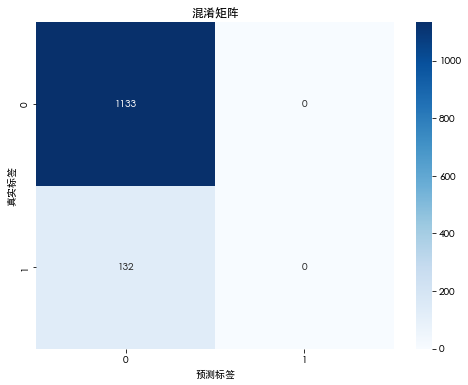

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# annot=True 表示在热力图上显示具体数值，fmt='d' 表示以整数形式显示
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵')
plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [45]:
scaler = StandardScaler()
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)

In [46]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [47]:
model = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_pca_scaled, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [48]:
print("最优超参数组合:", grid_search.best_params_)
print("最优模型在训练集上的 F1 值:", grid_search.best_score_)


最优超参数组合: {'C': 0.001, 'penalty': 'l1'}
最优模型在训练集上的 F1 值: 0.0


In [51]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_pca_scaled)

In [52]:
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)

/Volumes/Data/Environment/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
print(f"最优模型在测试集上的准确率: {accuracy_best * 100:.2f}%")
print(f"最优模型在测试集上的精确率: {precision_best * 100:.2f}%")
print(f"最优模型在测试集上的召回率: {recall_best * 100:.2f}%")
print(f"最优模型在测试集上的 F1 值: {f1_best * 100:.2f}%")

最优模型在测试集上的准确率: 89.57%
最优模型在测试集上的精确率: 0.00%
最优模型在测试集上的召回率: 0.00%
最优模型在测试集上的 F1 值: 0.00%


In [ ]:
import numpy as np
from sklearn.metrics import classification_report